## Liver Cirrhosis Data ETL and Preliminary Visualizations

In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
import numpy as np
import scipy.stats as stats

In [2]:
# Define data file path
liver_path = "https://raw.githubusercontent.com/amydohlin/project-4-group-2/main/original_data/liver_cirrhosis.csv"
# Read in the CSV
liver_data = pd.read_csv(liver_path)

# Put into pandas dataframe
liver_df = pd.DataFrame(liver_data)

# Preview the dataframe
liver_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [3]:
# Get basic info
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [4]:
# Check column names
liver_df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [5]:
# Find duplicate rows using N_Days and Age
# unique_patients = liver_df.drop_duplicates(subset=['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
#        'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
#        'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
#        'Stage'])
# unique_patients

patient_repeats = liver_df.loc[liver_df.duplicated(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'])]

patient_repeats

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
51,2224,C,Placebo,17874,F,N,Y,N,N,0.9,346.000000,3.37,81.000000,1098.000000,122.450000,90.000000,298.0,10.0,1
69,2224,C,Placebo,17874,F,N,Y,N,N,0.9,346.000000,3.37,81.000000,1098.000000,122.450000,90.000000,298.0,10.0,1
107,681,D,Placebo,11462,F,N,N,N,N,1.2,369.510563,2.96,97.648387,1982.655769,122.556346,124.702128,293.0,10.9,2
149,617,CL,Placebo,15341,F,Y,N,Y,N,5.5,369.510563,2.31,97.648387,1982.655769,122.556346,124.702128,102.0,10.8,3
154,1170,C,Placebo,16658,F,N,Y,Y,S,1.3,369.510563,3.41,97.648387,1982.655769,122.556346,124.702128,430.0,11.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.000000,9009.800000,127.710000,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.000000,9009.800000,127.710000,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.000000,790.000000,179.800000,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.000000,1637.000000,170.500000,70.000000,426.0,10.9,2


In [6]:
liver_clean_df = liver_df.drop_duplicates(subset=None, keep='first', inplace=False)
liver_clean_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.000000,598.000000,52.700000,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,3577,C,Placebo,17897,F,Y,N,Y,N,0.7,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1
24971,4795,C,Placebo,23376,F,Y,N,Y,N,1.8,369.510563,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1
24972,3358,D,D-penicillamine,24585,F,N,Y,N,N,2.1,262.000000,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3
24991,4365,C,D-penicillamine,21324,F,N,N,N,N,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2


In [7]:
liver_clean_df.to_csv("liver_clean.csv")

### Split the 'Stage' column into columns 'Stage 1', 'Stage 2', 'Stage 3'. Save a copy of this df to a csv for later machine learning if we don't want to use softmax (since the stage column has three outputs instead of 2)

In [8]:
# Check the unique values in the 'Stage' column to verify the stages are 1, 2, and 3
stage_count = liver_df['Stage'].unique()
stage_count

array([1, 2, 3])

In [9]:
# Create new columns

# Copy df to maintain original, add boolean to name
liver_boolean_df = liver_df.copy()

# Separate the 'Stage' column into
liver_boolean_df['Stage_1'] = liver_boolean_df.loc[liver_boolean_df['Stage'] == 1, 'Stage']
liver_boolean_df['Stage_2'] = liver_boolean_df.loc[liver_boolean_df['Stage'] == 2, 'Stage']
liver_boolean_df['Stage_3'] = liver_boolean_df.loc[liver_boolean_df['Stage'] == 3, 'Stage']
liver_boolean_df.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Stage_1,Stage_2,Stage_3
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,...,227.0,598.0,52.70,57.0,256.0,9.9,1,1.0,NaN,NaN
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,...,22.0,663.0,45.00,75.0,220.0,10.8,2,NaN,2.0,NaN
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,...,51.0,1243.0,122.45,80.0,225.0,10.0,2,NaN,2.0,NaN
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,...,23.0,1024.0,77.50,58.0,151.0,10.2,2,NaN,2.0,NaN
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,...,74.0,1052.0,108.50,109.0,151.0,11.5,1,1.0,NaN,NaN


In [10]:
# Convert the stage columns to boolean
liver_boolean_df['Stage_1'] = pd.notnull(liver_boolean_df['Stage_1'])
liver_boolean_df['Stage_2'] = pd.notnull(liver_boolean_df['Stage_2'])
liver_boolean_df['Stage_3'] = pd.notnull(liver_boolean_df['Stage_3'])

liver_boolean_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Stage_1,Stage_2,Stage_3
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,...,227.0,598.0,52.70,57.000000,256.0,9.9,1,True,False,False
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,...,22.0,663.0,45.00,75.000000,220.0,10.8,2,False,True,False
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,...,51.0,1243.0,122.45,80.000000,225.0,10.0,2,False,True,False
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,...,23.0,1024.0,77.50,58.000000,151.0,10.2,2,False,True,False
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,...,74.0,1052.0,108.50,109.000000,151.0,11.5,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,...,173.0,9009.8,127.71,96.000000,295.0,11.0,2,False,True,False
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,...,173.0,9009.8,127.71,96.000000,295.0,11.0,2,False,True,False
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,...,18.0,790.0,179.80,124.702128,104.0,13.0,3,False,False,True
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,...,13.0,1637.0,170.50,70.000000,426.0,10.9,2,False,True,False


In [11]:
# Export boolean df to csv for future use
liver_boolean_df.to_csv("liver_boolean.csv")

## Matplotlib Visualizations

In [12]:
# Create x and y variables for summary visualizations using "N_days" and "Stage" column

grouped_df = liver_clean_df.groupby("Stage")
number_months = grouped_df["N_Days"].mean()/30/12
X = grouped_df["Stage"].unique().tolist()
y = number_months
y = np.array(y)
X=np.array(X)
X= X.flatten()

print(X)
print(y)

[1 2 3]
[6.2831258  5.47591613 4.24856994]


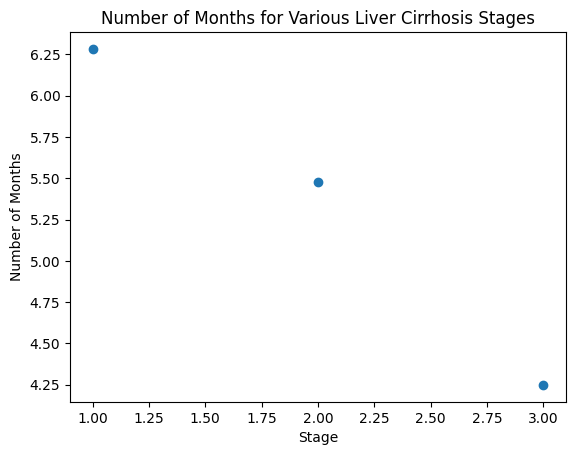

In [13]:
# Use matplotlib to create an overview scatter plot
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('Stage')
plt.ylabel('Number of Months')
plt.title("Number of Months for Various Liver Cirrhosis Stages")
plt.show()

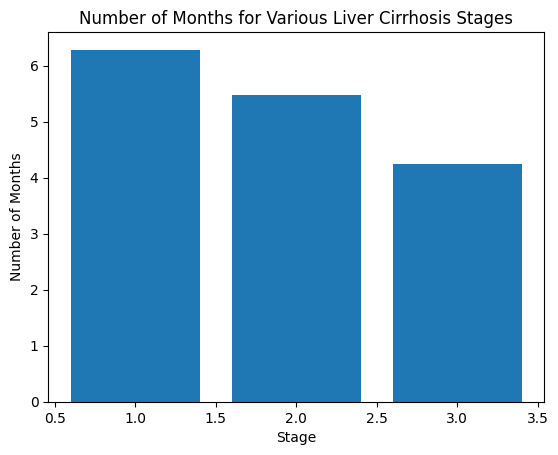

In [14]:
# Use matplotlib to create an overview bar plot

plt.bar(X,y)
plt.xlabel('Stage')
plt.ylabel('Number of Months')
plt.title("Number of Months for Various Liver Cirrhosis Stages")
plt.show()

In [15]:
# Identify Data outliers

# Select only numeric columns
numeric_cols = liver_clean_df.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles and IQR
# Q1 = numeric_cols.quantile(0.25)
# Q3 = numeric_cols.quantile(0.75)
# IQR = Q3 - Q1
# # IQR = 14580-3689.5

# # Determine outlier boundaries
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR


def is_outlier(row):
    Q1 = row.quantile(0.25)
    Q3 = row.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (row < lower_bound) | (row > upper_bound)



{'whiskers': [<matplotlib.lines.Line2D at 0x7ecefecc73d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ecefecc75b0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7ecefed39990>,
 'medians': [<matplotlib.lines.Line2D at 0x7ecefecc7850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ecefecc7400>,
 'means': []}

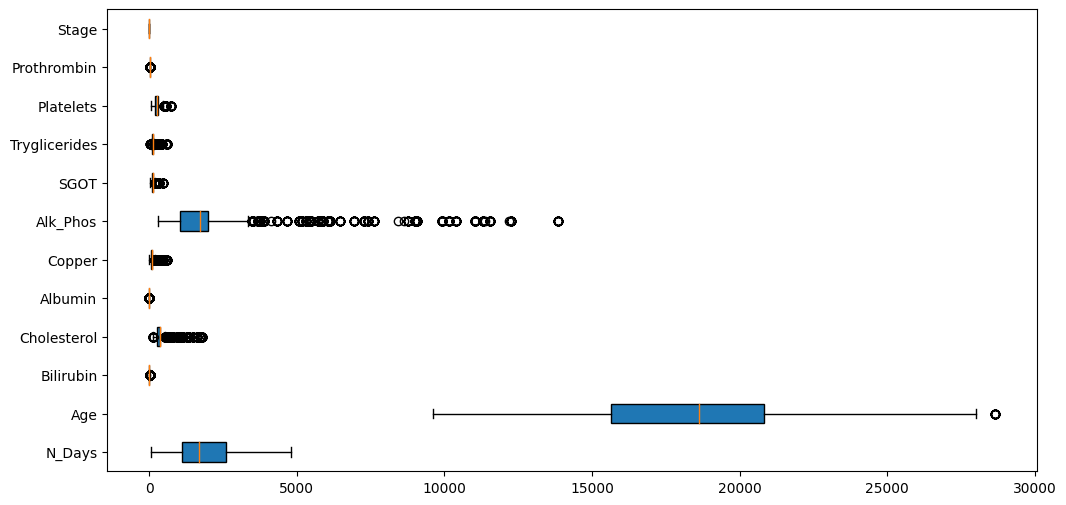

In [16]:
# Apply the function row-wise to detect outliers
outliers_mask = liver_clean_df[numeric_cols.columns].apply(is_outlier, axis=1)

# Filter the DataFrame to get rows with outliers
outliers = liver_clean_df[outliers_mask]

# Create a box plot to visualize the outliers
plt.figure(figsize=(12, 6))
plt.boxplot(numeric_cols.values, labels=numeric_cols.columns, vert=False, patch_artist=True, showfliers=True)


## SparkSQL Queries

In [17]:
# Import dependencies and Spark for Colab
import os

# spark_version = 'spark-3.4.0'
spark_version = 'spark-3.4.3'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,439 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [917 kB]
Get:13 http://security.u

In [30]:
# Import packages
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StructType,StructField,StringType, DateType,IntegerType
from pyspark import SparkFiles

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

liver_clean_df['Age'] = (liver_clean_df['Age'])/365
liver_clean_df.head()

<ipython-input-30-38f35d667a2c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_clean_df['Age'] = (liver_clean_df['Age'])/365


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,50.682192,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,54.038356,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,32.435616,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,45.115068,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,59.449315,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [31]:
# Create a Spark df from the Pandas df
# help from https://stackoverflow.com/questions/52943627/convert-a-pandas-dataframe-to-a-pyspark-dataframe
liver_clean_df_sp = spark.createDataFrame(liver_clean_df)
liver_clean_df_sp.show()

+------+------+-------+------------------+---+-------+------------+-------+-----+---------+-----------+-------+----------+-----------+-----------+-------------+---------+-----------+-----+
|N_Days|Status|   Drug|               Age|Sex|Ascites|Hepatomegaly|Spiders|Edema|Bilirubin|Cholesterol|Albumin|    Copper|   Alk_Phos|       SGOT|Tryglicerides|Platelets|Prothrombin|Stage|
+------+------+-------+------------------+---+-------+------------+-------+-----+---------+-----------+-------+----------+-----------+-----------+-------------+---------+-----------+-----+
|  2221|     C|Placebo| 50.68219178082192|  F|      N|           Y|      N|    N|      0.5|      149.0|   4.04|     227.0|      598.0|       52.7|         57.0|    256.0|        9.9|    1|
|  1230|     C|Placebo|54.038356164383565|  M|      Y|           N|      Y|    N|      0.5|      219.0|   3.93|      22.0|      663.0|       45.0|         75.0|    220.0|       10.8|    2|
|  4184|     C|Placebo| 32.43561643835616|  F|      N| 

In [32]:
# Create a temporary view of Stages
liver_clean_df_sp.createOrReplaceTempView("Stages")

In [33]:
# Use the temporary view to look at the different stages and how many patients were on placebos versus medication
spark.sql("""
SELECT Drug, Stage, COUNT (Drug) as DCount
FROM Stages
GROUP BY Drug, Stage
ORDER BY DCount desc """).show()

+---------------+-----+------+
|           Drug|Stage|DCount|
+---------------+-----+------+
|        Placebo|    3|  2167|
|        Placebo|    2|  2164|
|        Placebo|    1|  1881|
|D-penicillamine|    2|  1144|
|D-penicillamine|    1|  1144|
|D-penicillamine|    3|  1139|
+---------------+-----+------+



In [34]:
# Count of side effects present (value = Y in the df) for each stage
#COUNT (Ascites) as ACount, COUNT (Hepatomegaly) as HCount, COUNT (Spiders) as SCount, COUNT (Edema) as ECount
# AND Edema = 'S'
spark.sql("""
SELECT Stage, Ascites, Hepatomegaly, Spiders, Edema, COUNT (Ascites) as ACount, COUNT (Hepatomegaly) as HCount, COUNT (Spiders) as SCount, COUNT (Edema) as ECount
FROM Stages
WHERE Ascites = 'Y' AND Hepatomegaly = 'Y' AND Spiders = 'Y' AND Edema = 'Y'
GROUP BY Stage, Ascites, Hepatomegaly, Spiders, Edema
""").show()

+-----+-------+------------+-------+-----+------+------+------+------+
|Stage|Ascites|Hepatomegaly|Spiders|Edema|ACount|HCount|SCount|ECount|
+-----+-------+------------+-------+-----+------+------+------+------+
|    3|      Y|           Y|      Y|    Y|    71|    71|    71|    71|
|    2|      Y|           Y|      Y|    Y|     5|     5|     5|     5|
|    1|      Y|           Y|      Y|    Y|    13|    13|    13|    13|
+-----+-------+------------+-------+-----+------+------+------+------+



In [35]:
# Average number of days (to end of study) with each stage
spark.sql("""
SELECT Stage, AVG (N_Days) as AvgDays
FROM Stages
GROUP BY Stage
""").show()

+-----+------------------+
|Stage|           AvgDays|
+-----+------------------+
|    1|2261.9252892561985|
|    3|   1529.4851784634|
|    2| 1971.329806529625|
+-----+------------------+



In [36]:
# Number of female versus male patients with each stage
spark.sql("""
SELECT Sex, Stage, COUNT (Sex) as SCount
FROM Stages
GROUP BY Sex, Stage
""").show()

+---+-----+------+
|Sex|Stage|SCount|
+---+-----+------+
|  F|    2|  2922|
|  F|    1|  2755|
|  F|    3|  2883|
|  M|    3|   423|
|  M|    1|   270|
|  M|    2|   386|
+---+-----+------+



In [37]:
# Find the average age of patients at each stage
spark.sql("""
SELECT Stage, AVG (Age) as AvgAge
FROM Stages
GROUP BY Stage
""").show()

+-----+------------------+
|Stage|            AvgAge|
+-----+------------------+
|    1|49.916139024114045|
|    3| 52.37446734455398|
|    2| 49.13836527471785|
+-----+------------------+



Normal levels of bodily elements (found via Google):


*   Bilirubin: .1 - 1.2 mg/dL
* Chloesterol: < 200 mg/dL
* Albumin: 3.4 - 5.4 g/dL
* Copper: 62 - 140 ug/dL
* Alk-Phos: 44 - 147 IU/L
* SGOT: 8 - 45 IU/L
* Triglycerides: < 150 mg/dL
* Platelets: 150,000 - 450,000 count/uL
*   Prothrombin: 10 - 13 seconds (for blood to clot)

In [38]:
# Find averages of Bilirubin, Cholesterol, Albumin, Copper, Alk-Phos, SGOT, Triglycerides, Platelets, and Prothrombin in patients at each stage. Find only female patients who were on the placebo drug.
spark.sql("""
SELECT Stage, Sex, Drug, AVG (Bilirubin) as AvgBilirubin, AVG (Cholesterol) as AvgCholesterol, AVG (Albumin) as AvgAlbumin, AVG (Copper) as AvgCopper, AVG (Alk_Phos) as AvgAlk_Phos, AVG (SGOT) as AvgSGOT, AVG (Tryglicerides) as AvgTryglicerides, AVG (Platelets) as AvgPlatelets, AVG (Prothrombin) as AvgProthrombin
FROM Stages
WHERE Sex = 'F' AND Drug = 'Placebo'
GROUP BY Stage, Sex, Drug
""").show()

+-----+---+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Stage|Sex|   Drug|      AvgBilirubin|    AvgCholesterol|        AvgAlbumin|         AvgCopper|       AvgAlk_Phos|           AvgSGOT|  AvgTryglicerides|      AvgPlatelets|    AvgProthrombin|
+-----+---+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|    3|  F|Placebo|4.2716112531969355|358.91402687979394|3.3614578005115114|113.52269449815796|2101.7958252296717|127.01208028153408|128.51084509365782|  230.107713478261|11.099415207565222|
|    1|  F|Placebo|   2.5764265129683|354.20539027458085|3.5506512968299697| 84.89667751342932|1824.2111127573494|116.35381391481252|116.96258509198897|270.42735698559096|10.574575482167155|
|    2|  F|Placebo|2.9864229765013075|394.470

In [39]:
# Same parameters, but for female patients on the drug D-penicillamine
spark.sql("""
SELECT Stage, Sex, Drug, AVG (Bilirubin) as AvgBilirubin, AVG (Cholesterol) as AvgCholesterol, AVG (Albumin) as AvgAlbumin, AVG (Copper) as AvgCopper, AVG (Alk_Phos) as AvgAlk_Phos, AVG (SGOT) as AvgSGOT, AVG (Tryglicerides) as AvgTryglicerides, AVG (Platelets) as AvgPlatelets, AVG (Prothrombin) as AvgProthrombin
FROM Stages
WHERE Sex = 'F' AND Drug = 'D-penicillamine'
GROUP BY Stage, Sex, Drug
""").show()

+-----+---+---------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Stage|Sex|           Drug|      AvgBilirubin|   AvgCholesterol|        AvgAlbumin|         AvgCopper|       AvgAlk_Phos|           AvgSGOT|  AvgTryglicerides|      AvgPlatelets|    AvgProthrombin|
+-----+---+---------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|    1|  F|D-penicillamine|1.8297058823529426|351.8528790443138| 3.609156862745099| 75.61057558568619| 1821.343908326467|112.24333541588227|114.86852316500014| 291.1227176372549|10.388395550529415|
|    2|  F|D-penicillamine| 3.003277060575966|399.1105920571994|3.5809533267130083| 96.16069449394239|1994.0551733614666|123.01069934339598|125.53366858480653| 269.3222113505462|10.454021847070498|
|    3|  F

In [40]:
# Find averages of Bilirubin, Cholesterol, Albumin, Copper, Alk-Phos, SGOT, Triglycerides, Platelets, and Prothrombin in patients at each stage. Find only male patients who were on the placebo drug.
spark.sql("""
SELECT Stage, Sex, Drug, AVG (Bilirubin) as AvgBilirubin, AVG (Cholesterol) as AvgCholesterol, AVG (Albumin) as AvgAlbumin, AVG (Copper) as AvgCopper, AVG (Alk_Phos) as AvgAlk_Phos, AVG (SGOT) as AvgSGOT, AVG (Tryglicerides) as AvgTryglicerides, AVG (Platelets) as AvgPlatelets, AVG (Prothrombin) as AvgProthrombin
FROM Stages
WHERE Sex = 'M' AND Drug = 'Placebo'
GROUP BY Stage, Sex, Drug
""").show()

+-----+---+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Stage|Sex|   Drug|      AvgBilirubin|    AvgCholesterol|        AvgAlbumin|         AvgCopper|       AvgAlk_Phos|           AvgSGOT|  AvgTryglicerides|      AvgPlatelets|    AvgProthrombin|
+-----+---+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|    3|  M|Placebo|3.6268867924528316| 349.9893369716979| 3.372547169811321|108.63073645849057|2052.3662463160385|118.73371372641503|121.63749499528308|220.29268462264153|11.241509433962268|
|    1|  M|Placebo| 2.838356164383562|368.80571098630116|3.5447260273972594| 87.12540875068494|1917.5069282602747|117.49196129178083|123.83649083561649|236.18594123287673| 10.89931506849315|
|    2|  M|Placebo|3.6405622489959844| 410.99

In [41]:
# Same parameters, but for male patients on the drug D-penicillamine
spark.sql("""
SELECT Stage, Sex, Drug, AVG (Bilirubin) as AvgBilirubin, AVG (Cholesterol) as AvgCholesterol, AVG (Albumin) as AvgAlbumin, AVG (Copper) as AvgCopper, AVG (Alk_Phos) as AvgAlk_Phos, AVG (SGOT) as AvgSGOT, AVG (Tryglicerides) as AvgTryglicerides, AVG (Platelets) as AvgPlatelets, AVG (Prothrombin) as AvgProthrombin
FROM Stages
WHERE Sex = 'M' AND Drug = 'D-penicillamine'
GROUP BY Stage, Sex, Drug
""").show()

+-----+---+---------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Stage|Sex|           Drug|      AvgBilirubin|    AvgCholesterol|        AvgAlbumin|         AvgCopper|       AvgAlk_Phos|           AvgSGOT|  AvgTryglicerides|      AvgPlatelets|    AvgProthrombin|
+-----+---+---------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|    1|  M|D-penicillamine|2.4209677419354834| 365.4459336709677|3.5895967741935473| 96.04201352822581| 2370.853179233871|123.00490850806452|114.28757722258067|286.71027185483877| 10.28870967741936|
|    3|  M|D-penicillamine| 4.402369668246448| 370.7294406284359|3.4072511848341223|114.24384650710901| 2259.936994137441|126.23152297345969|120.58949279763036|198.67842379146924|11.134123222748803|
|    